KMeans Algorithm

Step1: Choose k value for ex: k=2

Step2: Initialize centroids randomly

Step3: Calculate Euclidean distance from centroids to each data point and form clusters that are close to centroids

Step4: Update the Cluster Classification for each point

Step5: Find the centroid of each cluster and update centroids

Step:6 Repeat step3


In [ ]:
# History
# Name    Date        Description
# -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   
# scl    9-24-201     Add code to calculate SSE 
#                     using the elbow method for k
# scl    9-24-2021    Modify accept different values for k 
# scl    9-25-2021    Add preprocessing for using csv input
#                     tested with LifeExpectancyData.csv
# scl    2-13-2022    Update for assignment 3 using random data.
# -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def calcDistance(data, p1):
  d = []
  for i in range(len(data)):
    x1 = data.iloc[i].x
    y1 = data.iloc[i].y
    p2 = np.array((x1,y1))
    dx = np.sqrt(np.sum(np.square(p1 - p2)))
    d.append(dx)
  return d

def classifyKMeans(df, kmeans):
  res = []

  # slice and get only the columns with distances
  df_dist = df[df.columns[-kmeans:]]  
  
  # loop through the points and 
  # check the closest distances to classify 
  # which cluster the point belongs to for each iteration
  for row in df_dist.iloc:
    closest = row.min()
    cluster = row.idxmin()
    res.append(cluster)
  df['class'] = res
  return df

# -- scl 
# stop here for now need to fix how to calculate the
# new centriods after the points are classified to a cluster
#  How do you know?
def calcCentroid(df):
  c = df.groupby(['class'])
  c = c.mean().round(2)
  print(c)
  return c

# scl 2-13-2022 
def generateRandomData(num_points, k):
  s = np.random.randint(1,99)
  np.random.seed(s)
  X_features = np.random.randint(1,99, size=(num_points,2))
  y_labels = np.random.randint(1,k+1, size=len(X_features))
  y_labels = pd.Series(y_labels)
  return X_features, y_labels


In [ ]:
def main():
  # First: let's prepare the data that we are going to use
  # this is always necessary when do AI and Machine Learning
  # it is an important step as data scientists. And also set
  # the value for k.  Note that eventually use the elbow method 
  # for determining the value of k, but for now lets just set it manually
  k = 3

  # -- scl generate random numbers instead
  NUM_POINTS = 20
  X, y = generateRandomData(NUM_POINTS, k)

  # create the main data frame called data
  data = pd.DataFrame(X, columns=['x','y'])
  data['class'] = y.values
  data.head()

  # create the list of centroids base on the value of k
  # to represent the number of clusters to try and
  # detect with this data set.
  centroids = [0 for x in range(k)]
  centroids = calcCentroid(data)

  iter = 4
  i = 1
  for iter in range(iter):
    for i in range (len(centroids)):
      center_point = np.array([(centroids.iloc[i].x, centroids.iloc[i].y)])
      dist = calcDistance(data, center_point)
      data['dist'+str(i)] = dist
      i += 1
    i = 1

    # classify the points
    data = classifyKMeans(data, k)

    # calculate new centriods
    new_centroids = calcCentroid(data)
    centroids = new_centroids

    print('\n- - - - - - - - - - - - - - - - - - - - - - \n')
    print('             ITERATION = ', iter)
    print('\n- - - - - - - - - - - - - - - - - - - - - - \n')

    #print(data)
    print('\n- - - - - - - - - - - - - - - - - - - - - - \n')

  return data

In [ ]:
result = main()


           x      y
class              
1      45.67  40.78
2      71.25  48.75
3      38.86  46.29
           x      y  dist0  dist1  dist2
class                                   
dist0  43.75  16.25  25.86  43.98  31.37
dist1  80.00  49.00  43.96  28.74  49.28
dist2  19.12  53.62  35.88  56.38  29.63

- - - - - - - - - - - - - - - - - - - - - - 

             ITERATION =  0

- - - - - - - - - - - - - - - - - - - - - - 


- - - - - - - - - - - - - - - - - - - - - - 

           x      y  dist0  dist1  dist2
class                                   
dist0  48.60  18.00  16.75  45.52  48.04
dist1  81.71  52.43  56.90  26.93  68.20
dist2  19.12  53.62  47.86  64.55  22.13

- - - - - - - - - - - - - - - - - - - - - - 

             ITERATION =  1

- - - - - - - - - - - - - - - - - - - - - - 


- - - - - - - - - - - - - - - - - - - - - - 

           x      y  dist0  dist1  dist2
class                                   
dist0  52.33  18.83  17.06  46.10  50.07
dist1  83.50  57.33  57.31  2

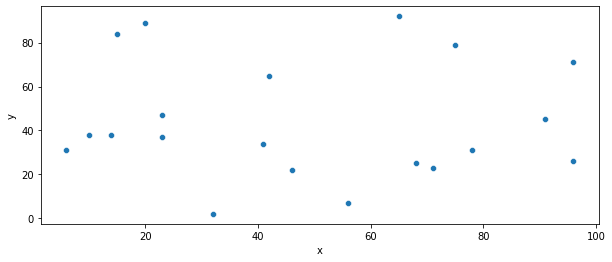

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=result, x='x', y='y')

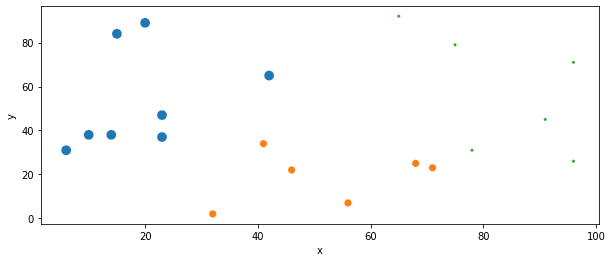

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=result, x=result.x, y=result.y, size='class', sizes=(10,100), hue='class', legend=False)